In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import camb
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.optimize
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

### Creating "fake" observational data

In [6]:
pars_test = camb.set_params(H0=67.5, 
                            ombh2=0.022, 
                            omch2=0.120*1.2, 
                            redshifts=[0], 
                            kmax=10, 
                            As=2e-9, 
                            ns=0.96, 
                            halofit_version='mead2020_feedback', 
                            HMCode_A_baryon = 0, 
                            HMCode_eta_baryon = 0, 
                            HMCode_logT_AGN = -10)
                            # zero the HMCode to get a universe without baryonic feedback
results_test = camb.get_transfer_functions(pars_test)
kh_test, _, pk_test = results_test.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)

kh_data = kh_test
pk_data = pk_test[0]

### Creating cosmology based on Planck2018 for reference

In [7]:
pars_planck_2018 = camb.set_params(H0=67.4, ombh2=0.0224, omch2=0.120,
                                  redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                                  halofit_version='mead2020_feedback',
                                  HMCode_A_baryon=0, HMCode_eta_baryon=0, HMCode_logT_AGN=-10)
results_planck_2018 = camb.get_transfer_functions(pars_planck_2018)
kh_planck2018, _, pk_planck2018 = results_planck_2018.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)

## Varying A_baryon

In [8]:
def varying_A(A_feedback):
    A_baryon_pk = []
    A_baryon_kh = []
    for baryon in A_feedback:    
        pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                               halofit_version='mead', 
                               HMCode_A_baryon = baryon)
        results = camb.get_transfer_functions(pars)
        kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
        A_baryon_pk.append(pk[0])
        A_baryon_kh.append(kh)
    return A_baryon_kh, A_baryon_pk

In [10]:
A_baryons = np.arange(2.817, 3.443, 0.05)

kh_varied_A = varying_A(A_baryons)[0]
pk_varied_A = varying_A(A_baryons)[1]

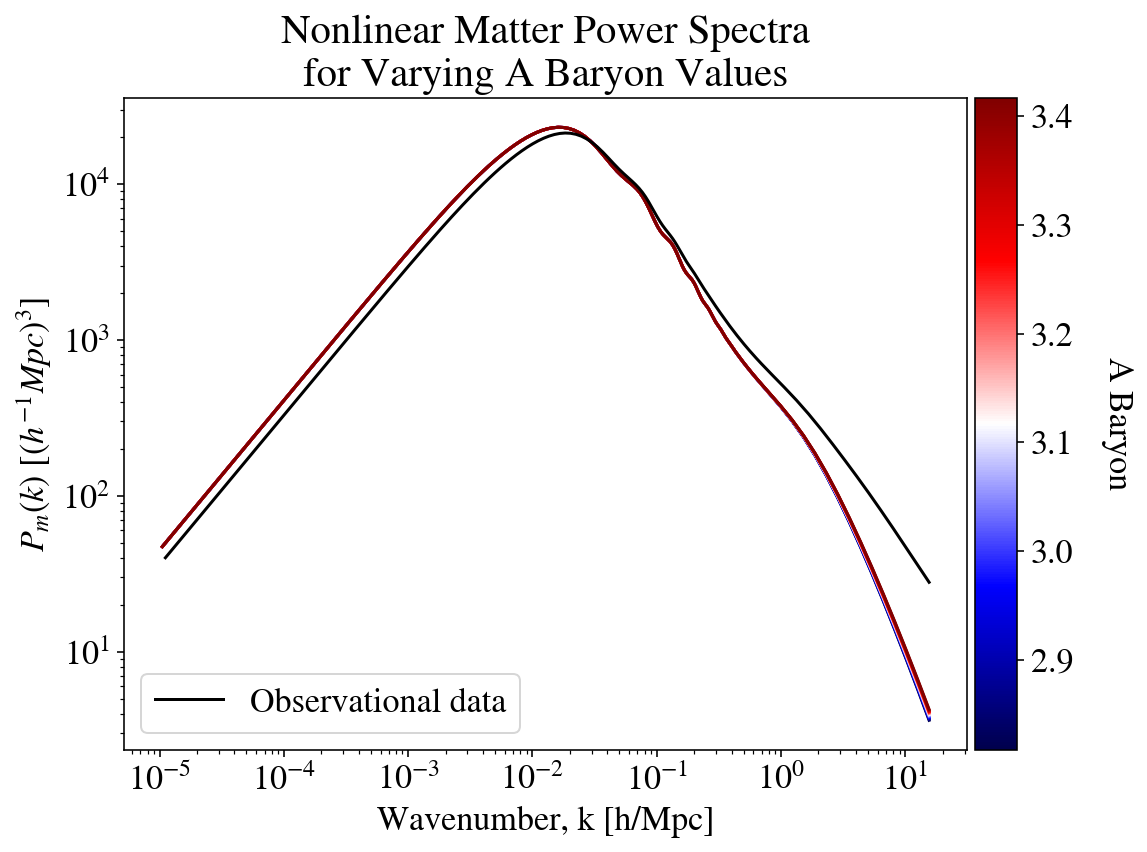

In [12]:
cmap = plt.cm.seismic
n = len(A_baryons)
colors = cmap(np.linspace(0,1,n))

fig, ax = plt.subplots(1, 1, figsize = (8,6))
for i in range(len(kh_varied_A)):
    ax.loglog(kh_varied_A[i], pk_varied_A[i], color=colors[i])
ax.loglog(kh_data, pk_data, 'k-', label='Observational data')
ax.legend(loc='lower left')
    
norm_scaling = mpl.colors.Normalize(vmin=min(A_baryons), vmax=max(A_baryons))
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
cbar.set_label("A Baryon", rotation=270, labelpad=30)

ax.set_xlabel('Wavenumber, k [h/Mpc]')
ax.set_ylabel('$P_m(k)$ [($h^{-1}Mpc)^3$]')
ax.set_title('Nonlinear Matter Power Spectra\nfor Varying A Baryon Values')
plt.show()

## Varying eta_baryon

In [13]:
def varying_eta(eta_feedback):
    eta_baryon_kh = []
    eta_baryon_pk = []
    for baryon in eta_feedback:    
        pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                               halofit_version='mead', 
                               HMCode_eta_baryon = baryon)
        results = camb.get_transfer_functions(pars)
        kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
        eta_baryon_pk.append(pk[0])
        eta_baryon_kh.append(kh)
    return eta_baryon_kh, eta_baryon_pk

In [17]:
eta_baryons = np.arange(0, 2, 0.1)

kh_varied_eta = varying_eta(eta_baryons)[0]
pk_varied_eta = varying_eta(eta_baryons)[1]

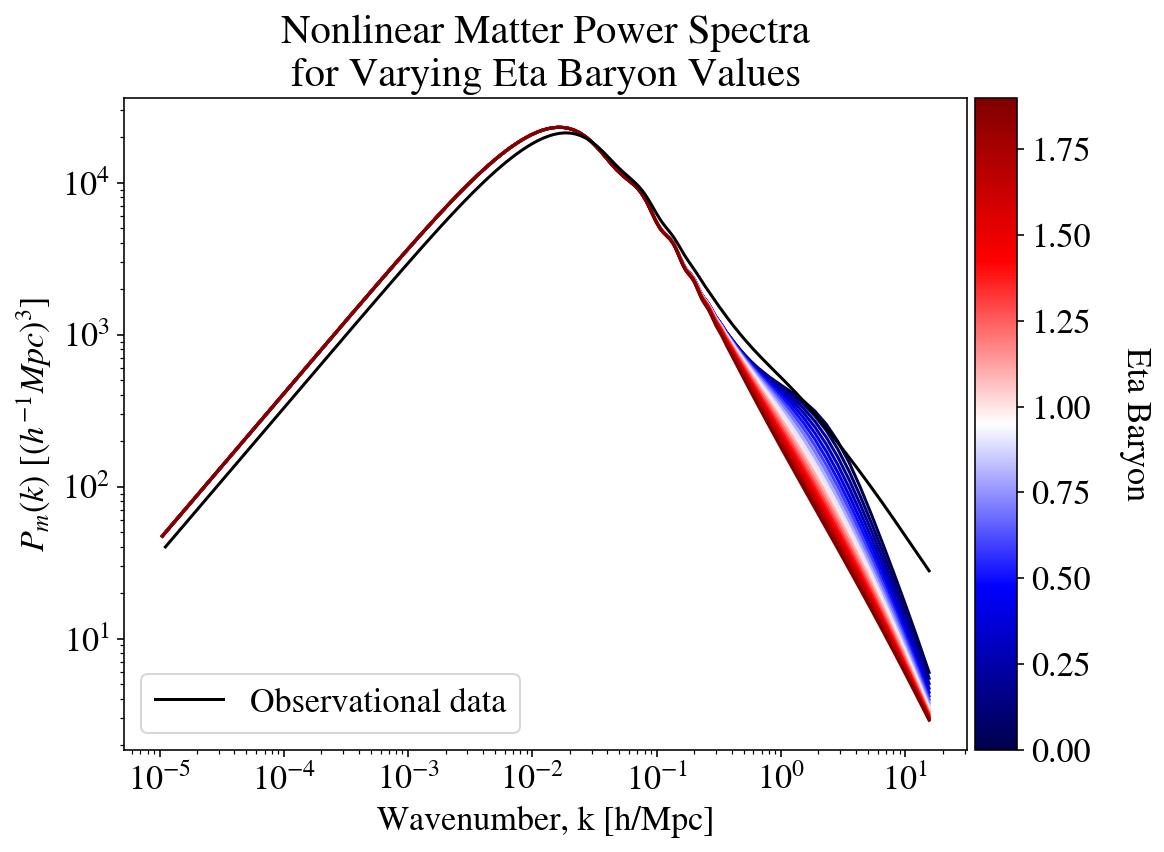

In [18]:
cmap = plt.cm.seismic
n = len(eta_baryons)
colors = cmap(np.linspace(0,1,n))

fig, ax = plt.subplots(1, 1, figsize = (8,6))
for i in range(len(kh_varied_eta)):
    ax.loglog(kh_varied_eta[i], pk_varied_eta[i], color=colors[i])
ax.loglog(kh_data, pk_data, 'k-', label='Observational data')
ax.legend(loc='lower left')
    
norm_scaling = mpl.colors.Normalize(vmin=min(eta_baryons), vmax=max(eta_baryons))
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
cbar.set_label("Eta Baryon", rotation=270, labelpad=30)

ax.set_xlabel('Wavenumber, k [h/Mpc]')
ax.set_ylabel('$P_m(k)$ [($h^{-1}Mpc)^3$]')
ax.set_title('Nonlinear Matter Power Spectra\nfor Varying Eta Baryon Values')
plt.show()

## Varying logT_AGN

In [19]:
def varying_logT_AGN(logT_AGN_feedback):
    logT_AGN_kh = []
    logT_AGN_pk = []
    for baryon in logT_AGN_feedback:    
        pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                               halofit_version='mead2020_feedback', 
                               HMCode_logT_AGN = baryon)
        results = camb.get_transfer_functions(pars)
        kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
        logT_AGN_pk.append(pk[0])
        logT_AGN_kh.append(kh)
    return logT_AGN_kh, logT_AGN_pk

In [28]:
logT_AGN_feedback = np.arange(-10, 10, 1)

kh_varied_logT_AGN = varying_logT_AGN(logT_AGN_feedback)[0]
pk_varied_logT_AGN = varying_logT_AGN(logT_AGN_feedback)[1]

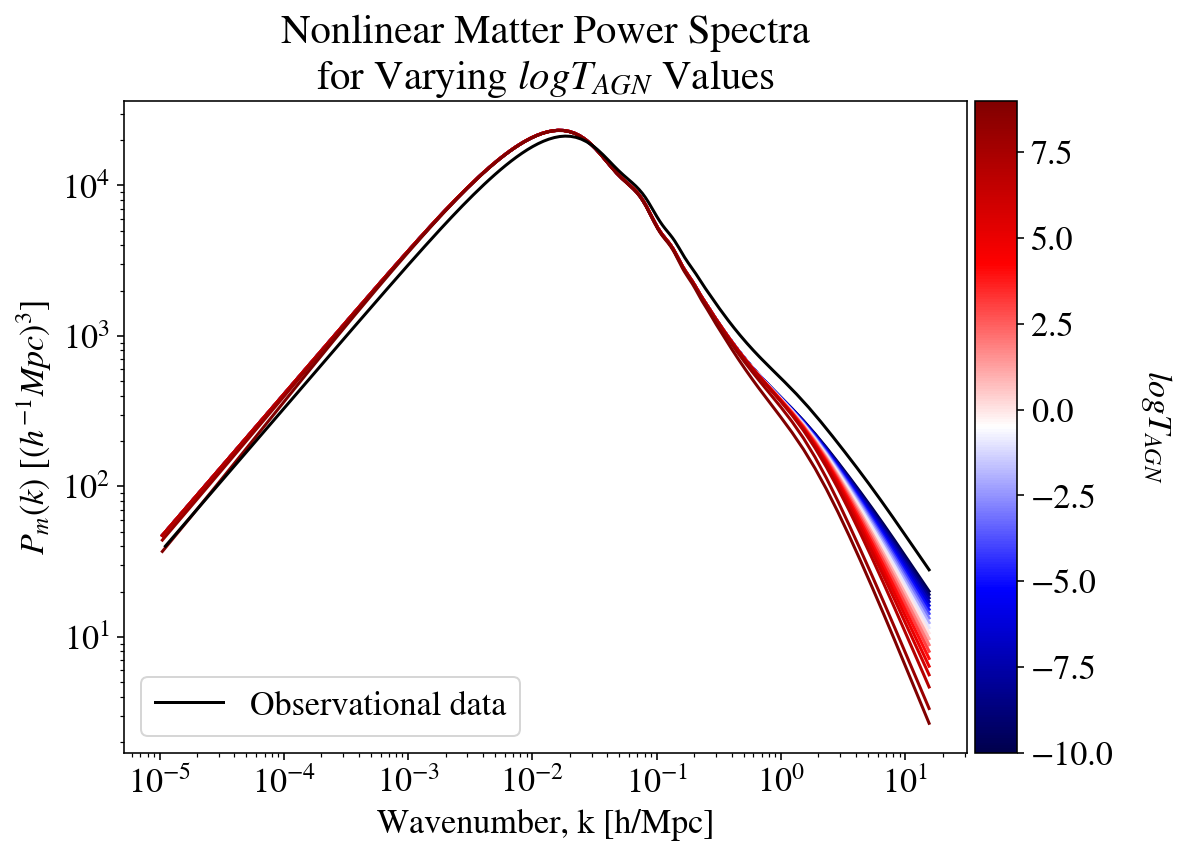

In [29]:
cmap = plt.cm.seismic
n = len(logT_AGN_feedback)
colors = cmap(np.linspace(0,1,n))

fig, ax = plt.subplots(1, 1, figsize = (8,6))
for i in range(len(kh_varied_logT_AGN)):
    ax.loglog(kh_varied_logT_AGN[i], pk_varied_logT_AGN[i], color=colors[i])
ax.loglog(kh_data, pk_data, 'k-', label='Observational data')
ax.legend(loc='lower left')

norm_scaling = mpl.colors.Normalize(vmin=min(logT_AGN_feedback), vmax=max(logT_AGN_feedback))
divider = axgrid.make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.05)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_scaling, cmap=cmap), cax=cax)
cbar.set_label("$logT_{AGN}$", rotation=270, labelpad=30)

ax.set_xlabel('Wavenumber, k [h/Mpc]')
ax.set_ylabel('$P_m(k)$ [($h^{-1}Mpc)^3$]')
ax.set_title('Nonlinear Matter Power Spectra\nfor Varying $logT_{AGN}$ Values')
plt.show()

# Fitting by eye

In [31]:
def baryon_feedback(A_baryon, eta_baryon, logT_AGN):
    pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, redshifts=[0], kmax=10, As=2e-9, ns=0.96, 
                           halofit_version='mead2020_feedback', 
                           HMCode_A_baryon = A_baryon, 
                           HMCode_eta_baryon = eta_baryon, 
                           HMCode_logT_AGN = logT_AGN)
    results = camb.get_transfer_functions(pars)
    kh, _ , pk = results.get_nonlinear_matter_power_spectrum(hubble_units=True, k_hunit=True)
    return kh, pk[0]

<Figure size 432x288 with 0 Axes>

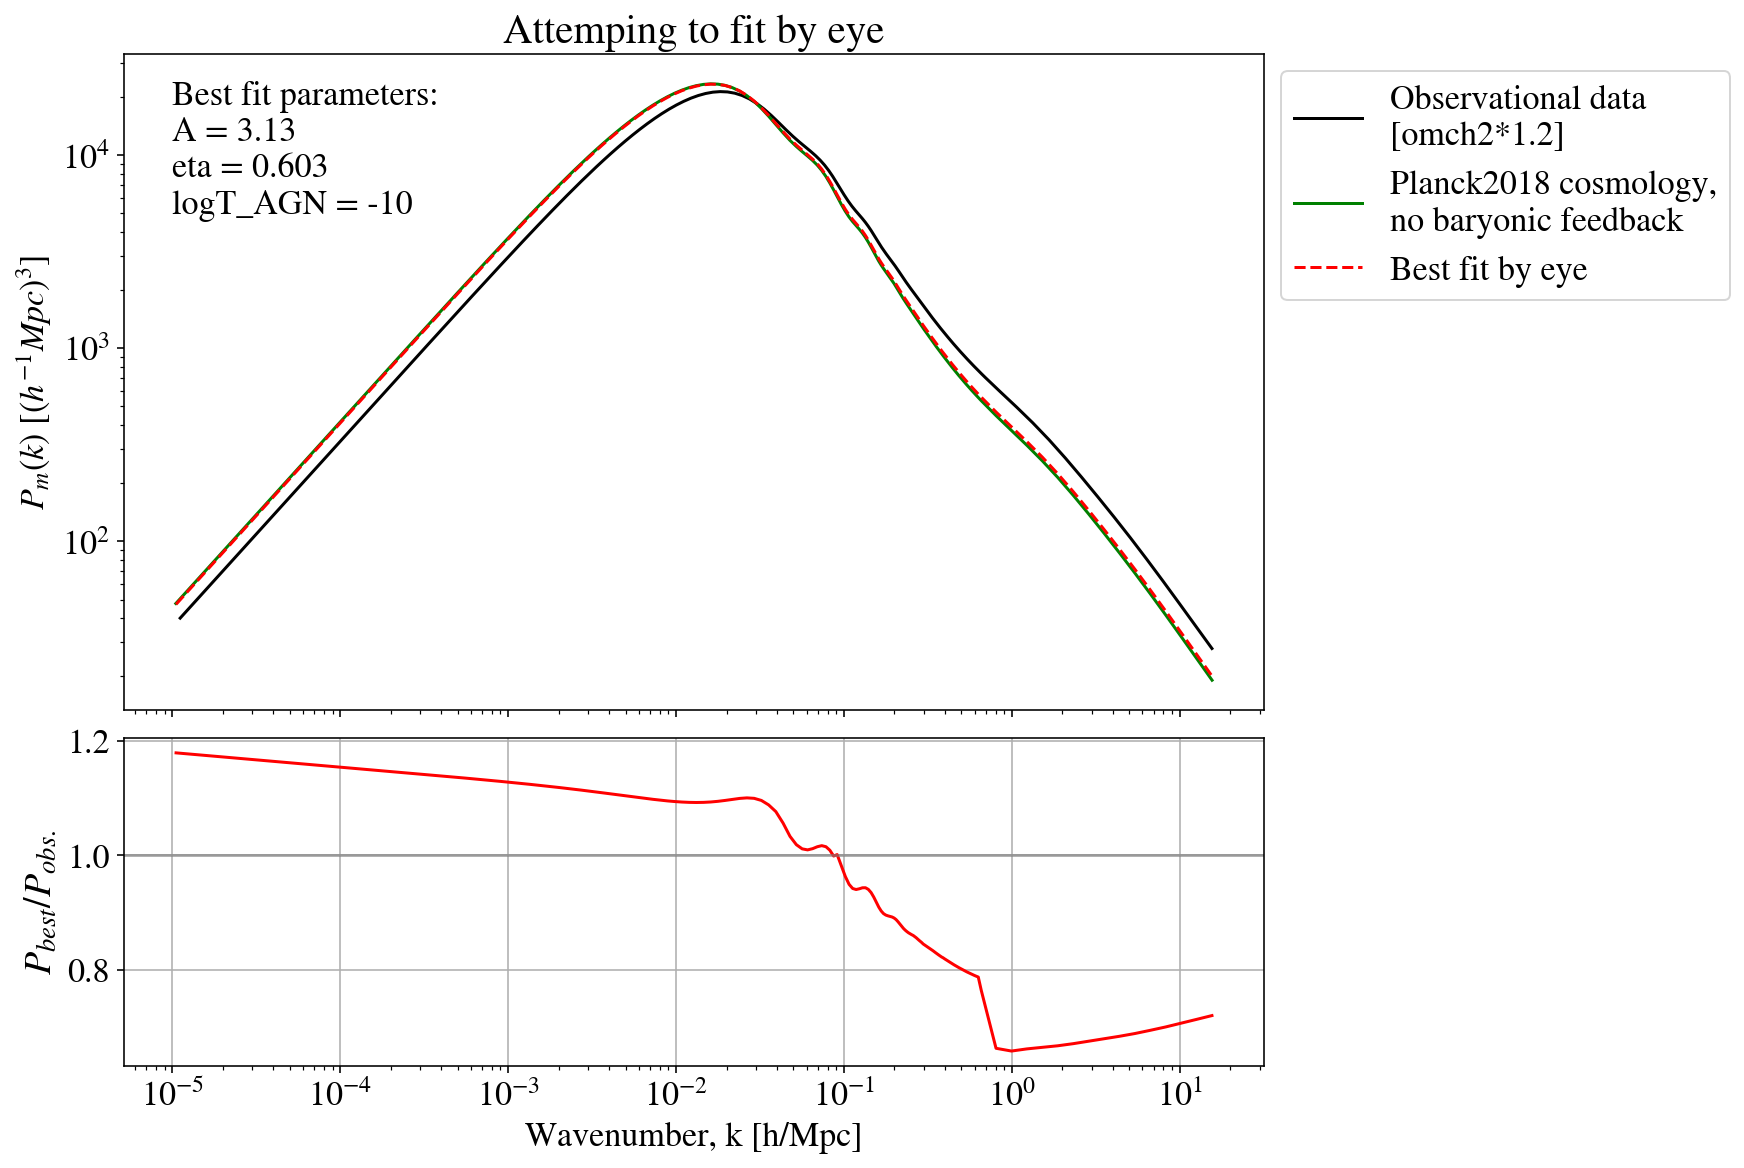

In [34]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, 
                               figsize=(12,8), 
                               constrained_layout=True, 
                               sharex=True, 
                               gridspec_kw={'height_ratios':[3, 1.5]})
#fig.suptitle('Attemping to fit by eye')

ax0.loglog(kh_data, pk_data, 'k-', label='Observational data\n[omch2*1.2]')
ax0.loglog(kh_planck2018, pk_planck2018[0], 'g-', label='Planck2018 cosmology,\nno baryonic feedback')
#ax0.loglog(kh_data, baryon_feedback(kh_data, 3.13, 0.2, 2), 'r-')
#ax0.loglog(kh_data, baryon_feedback(kh_data, 3.13, 0.2, 0), 'c', label='Best fit by eye')
#ax0.loglog(kh_data, baryon_feedback(kh_data, 3.13, 0.8, -10), 'r', linestyle='--')
ax0.loglog(baryon_feedback(3.13, 0.603, -10)[0], baryon_feedback(3.13, 0.603, -10)[1], 'r', linestyle='--', label='Best fit by eye')
#ax0.loglog(kh_data, baryon_feedback(kh_data, 3.13, -1, -10), 'm', linestyle='--')

ax0.set_title('Attemping to fit by eye')
ax0.set_ylabel('$P_m(k)$ [($h^{-1}Mpc)^3$]')
ax0.legend(bbox_to_anchor = (1, 1), loc='upper left')
props = dict(boxstyle='round', facecolor='white')
ax0.text(0.00001, 5000, 'Best fit parameters:\nA = 3.13\neta = 0.603\nlogT_AGN = -10')


#ax1.semilogx(kh_data, baryon_feedback(kh_data, 3.16, 0.8, -10)/pk_data, 'y-')
ax1.semilogx(baryon_feedback(3.13, 0.603, -10)[0], baryon_feedback(3.13, 0.603, -10)[1]/pk_data, color='r', linestyle='-')
#ax1.semilogx(kh_data, baryon_feedback(kh_data, 0, 0, -10)/baryon_feedback(kh_data, 3.13, 0.603, -10), color='g', linestyle='--')
ax1.axhline(1, color='grey', alpha=0.6)
ax1.set_ylabel('$P_{best}/P_{obs.}$', fontsize=19)
ax1.set_xlabel('Wavenumber, k [h/Mpc]')
ax1.grid()
plt.show()